In [1]:
%matplotlib inline
from collections import OrderedDict, Counter, defaultdict
import glob 
import itertools
from itertools import izip
import os

from IPython.core.display import HTML
import gffutils
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from clipper.src import CLIP_analysis
from clipper.src import CLIP_analysis_display
from gscripts.general import dataviz
from gscripts import GO
from gscripts.general import region_helpers

fig_dir = "."
img_dir = "."

In [2]:
regions = OrderedDict()
regions['all'] = 'All'
regions["cds"] = "CDS"
regions["three_prime_utrs"] = "3' UTR"
regions["five_prime_utrs"] = "5' UTR"
regions["proxintron500"] = "Proximal\nIntron"
regions["distintron500"] = "Distal\nIntron"

assigned_regions = regions.copy()
del assigned_regions['all'] 
def move_name(interval):
    interval.name = interval[12]
    return interval

viz = CLIP_analysis_display.ClipVisualization()

def plot_denovo_motifs(bedtool, fig=None):
    root = "/nas3/gpratt/iPython_Notebook/taf15/"
    out_dir = os.path.join(root, "assigned/")
    fasta_dir = os.path.join(root, "fasta/")
    cluster_name = os.path.basename(bedtool.fn)
    cluster_out = os.path.join(root, bedtool.fn + "_homer")
                               
    cluster_regions = CLIP_analysis.assign_to_regions(tool=bedtool, 
                                                      clusters=cluster_name, 
                                                      regions=assigned_regions, 
                                                      assigned_dir = out_dir,
                                                      species="mm9"
                                                      )

    CLIP_analysis.make_fasta_files_from_regions(cluster_regions, cluster_name, fasta_dir, "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")
    CLIP_analysis.calculate_homer_motifs([5,6,7,8], regions, cluster_name, fasta_dir, cluster_out)

    if fig is None:
        fig = plt.figure(figsize=(20, 20))
        
    full_grid = gridspec.GridSpec(6, 4)
    motif_grid = gridspec.GridSpecFromSubplotSpec(1, 6,
                                                  subplot_spec=full_grid[4:6, :],
                                                  hspace=0,
                                                  wspace=0)

    viz.build_common_motifs(motif_grid, cluster_out)
    
    
gene_id_to_name = region_helpers.gene_id_to_name("/nas3/gpratt/gencode/gencode.vM1.annotation.gtf.db")
gene_id_to_type = region_helpers.gene_id_to_type("/nas3/gpratt/gencode/gencode.vM1.annotation.gtf.db")

In [3]:
rbps = {"taf15": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed"),
        "tls": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed"),
        "tdp43": pybedtools.BedTool("/nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed"),
 }

There are a total 72386 clusters I'll examine
For region: cds found 529 that overlap and 71857 that don't
For region: three_prime_utrs found 3010 that overlap and 68847 that don't
For region: five_prime_utrs found 194 that overlap and 68653 that don't
For region: proxintron500 found 8436 that overlap and 60217 that don't
For region: distintron500 found 57513 that overlap and 2704 that don't
After assigning 2704 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TDP43brainclip_MP41_kcomb_notrim_ingenes_clusters_mm950.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpra

/nas/nas0/yeolab/Software/lib/python2.7/site-packages/matplotlib-1.4.x-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:1240: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


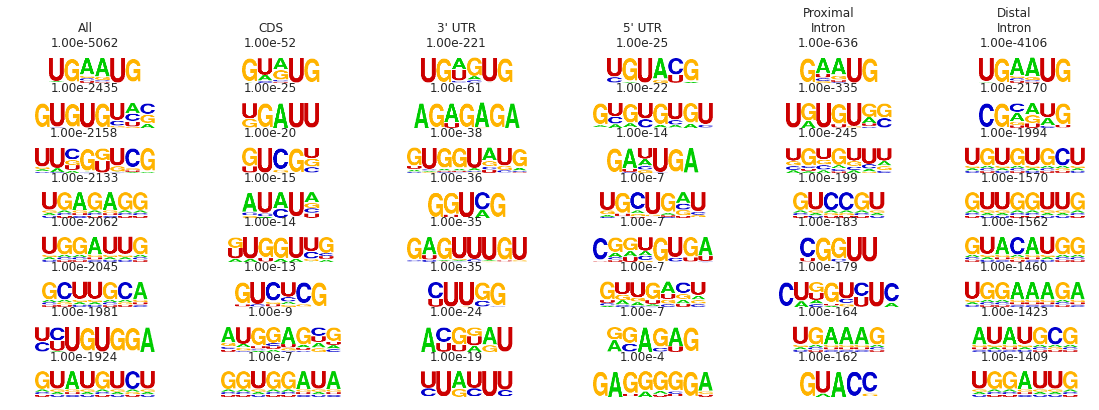

In [4]:
plot_denovo_motifs(rbps['tdp43'])

There are a total 160908 clusters I'll examine
For region: cds found 13266 that overlap and 147642 that don't
For region: three_prime_utrs found 10784 that overlap and 136858 that don't
For region: five_prime_utrs found 948 that overlap and 135910 that don't
For region: proxintron500 found 21296 that overlap and 114614 that don't
For region: distintron500 found 109460 that overlap and 5154 that don't
After assigning 5154 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TLS_hiseq_notrim_ingenes_clusters_mm950.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_

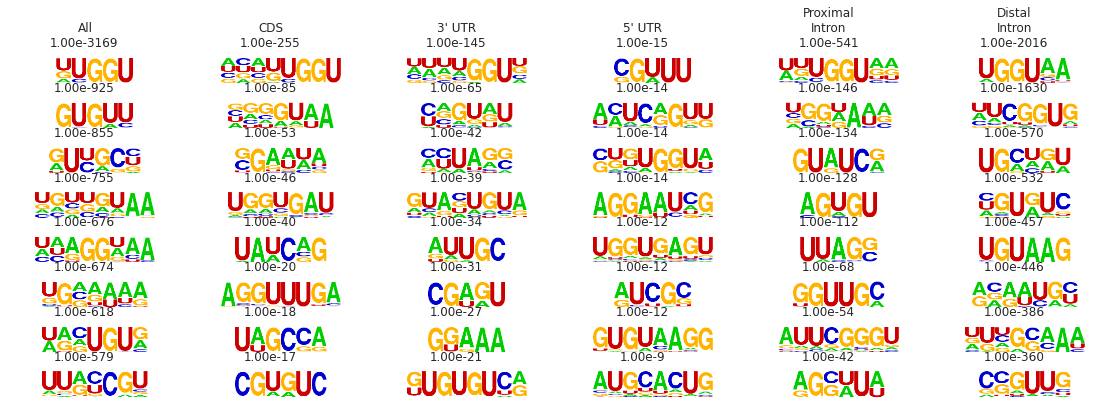

In [7]:
plot_denovo_motifs(rbps['tls'])

There are a total 46453 clusters I'll examine
For region: cds found 1482 that overlap and 44971 that don't
For region: three_prime_utrs found 5706 that overlap and 39265 that don't
For region: five_prime_utrs found 276 that overlap and 38989 that don't
For region: proxintron500 found 4786 that overlap and 34203 that don't
For region: distintron500 found 32355 that overlap and 1848 that don't
After assigning 1848 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuf

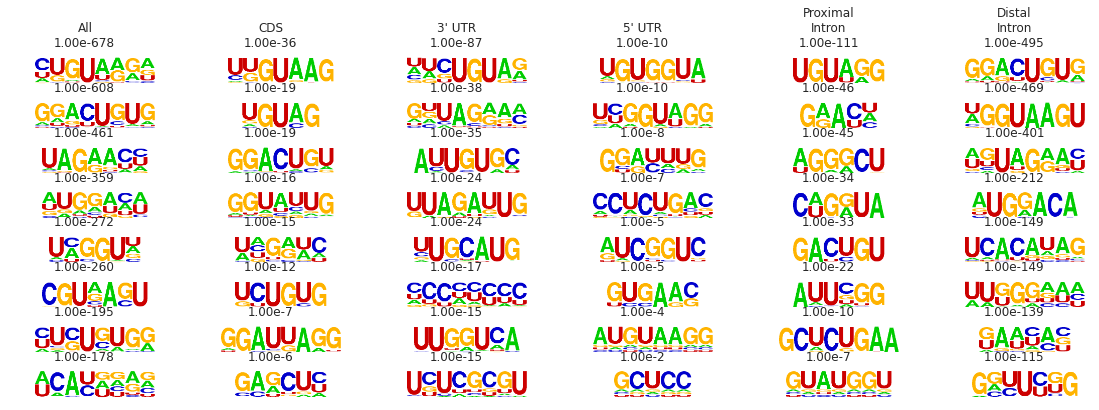

In [6]:
plot_denovo_motifs(rbps['taf15'])

There are a total 46453 clusters I'll examine
For region: cds found 1482 that overlap and 44971 that don't
For region: three_prime_utrs found 5706 that overlap and 39265 that don't
For region: five_prime_utrs found 276 that overlap and 38989 that don't
For region: proxintron500 found 4786 that overlap and 34203 that don't
For region: distintron500 found 32355 that overlap and 1848 that don't
After assigning 1848 un-categorized regions
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed_homer/all
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed_homer/cds
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuff_for_KK/TAF15_combined_notrim_ingenes_clusters_mm950.bed_homer/three_prime_utrs
starting Homer
Homer Finished, output here: /nas3/gpratt/projects/fet_family/data/stuf

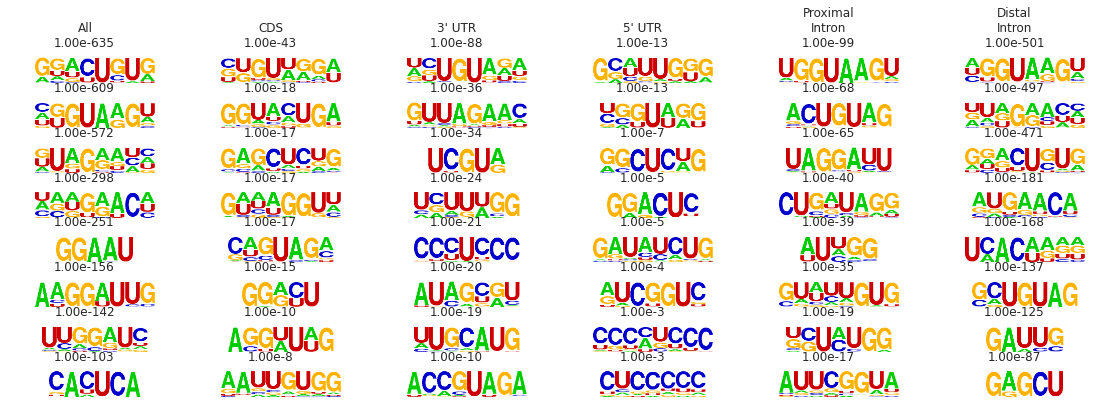

In [9]:
plot_denovo_motifs(rbps['taf15'])

In [11]:
CLIP_analysis.run_homer??

In [13]:
import subprocess

In [22]:
def run_homer(foreground, background, k=list([5,6,7,8,9]), outloc=os.getcwd()):
    
    """
    
    runs homer with standard args
    output location is saved
    
    foreground - str, location of fasta file for the foreground distribution
    background - str, location of fasta file for the background distribution
    k - different k-mers to examine
    outloc - directory to output homer results 

    --make optional make work off locations and not fasta files 
    
    """
    #findMotifs.pl clusters.fa fasta outloc -nofacts p 4 -rna -S 10 -len 5,6,7,8,9 -noconvert -nogo -fasta background.fa
    #converts k to a string for use in subprocess
    k = ",".join([str(x) for x in k])
    print "starting Homer"
    
    try:
        with open(os.devnull, 'w') as fnull:
            print "findMotifs.pl", foreground, "fasta", outloc, "-nofacts", "-p", "4", "-rna", "-S", "20", "-len", k, "-noconvert", "-nogo", "-fasta", background, "-chopify"
            result = subprocess.call(["findMotifs.pl", foreground, "fasta", 
                                  outloc, "-nofacts", "-p", "4", "-rna", "-S", "20",
                                   "-len", k, "-noconvert", "-nogo", "-fasta", background, "-chopify"], shell=False, stdout=fnull)
            
        print "Homer Finished, output here: %s" % outloc
    except OSError:
        print "Homer not installed, ignoring motif generation, install homer for this to work"  
        raise

In [12]:
def calculate_homer_motifs(kmer_list, regions, clusters, fasta_dir, homerout):
    
    """
    
    Calculates motiffs for homer
    
    kmer_list - list[int] different kmers to examine
    regions   - list[str] regions to compute kmers on
    clusters - str name out output file
    fasta_dir - str directoy of fasta files
    homerout - str output dir of homer
    
    """
    if kmer_list is None:
        return None
    
    for region in regions:
        #reads nicely named files
        real_fa = CLIP_analysis.fa_file(clusters, region=region, directory=fasta_dir, type="real")
        if region == "all":
            region = "genes"
        rand_fa = os.path.join("/nas3/gpratt/clipper/clipper/data/regions", "mm9_" + region + ".fasta")
        #rand_fa = CLIP_analysis.fa_file(clusters, region=region, directory=fasta_dir, type="random")

        region_homer_out = os.path.join(homerout, region)
        run_homer(real_fa, rand_fa, kmer_list, outloc=region_homer_out)

In [4]:
regions = OrderedDict()
regions['all'] = 'All'
regions["cds"] = "CDS"
regions["three_prime_utrs"] = "3' UTR"
regions["five_prime_utrs"] = "5' UTR"
regions["proxintron500"] = "Proximal\nIntron"
regions["distintron500"] = "Distal\nIntron"

assigned_regions = regions.copy()
del assigned_regions['all'] 
def move_name(interval):
    interval.name = interval[12]
    return interval

viz = CLIP_analysis_display.ClipVisualization()

def plot_denovo_motifs(bedtool, fig=None):
    root = "/nas3/gpratt/iPython_Notebook/taf15/"
    out_dir = os.path.join(root, "assigned/")
    fasta_dir = os.path.join(root, "fasta/")
    cluster_name = os.path.basename(bedtool.fn)
    cluster_out = os.path.join(root, bedtool.fn + "_homer")
                               
#     cluster_regions = CLIP_analysis.assign_to_regions(tool=bedtool, 
#                                                       clusters=cluster_name, 
#                                                       regions=assigned_regions, 
#                                                       assigned_dir = out_dir,
#                                                       species="mm9"
#                                                       )

#     CLIP_analysis.make_fasta_files_from_regions(cluster_regions, cluster_name, fasta_dir, "/nas3/yeolab/Genome/ucsc/mm9/chromosomes/all.fa")
#     calculate_homer_motifs([5,6,7,8], regions, cluster_name, fasta_dir, cluster_out)

    if fig is None:
        fig = plt.figure(figsize=(20, 20))
        
    full_grid = gridspec.GridSpec(6, 4)
    motif_grid = gridspec.GridSpecFromSubplotSpec(1, 6,
                                                  subplot_spec=full_grid[4:6, :],
                                                  hspace=0,
                                                  wspace=0)

    viz.build_common_motifs(motif_grid, cluster_out)

In [6]:
import matplotlib.pyplot as plt

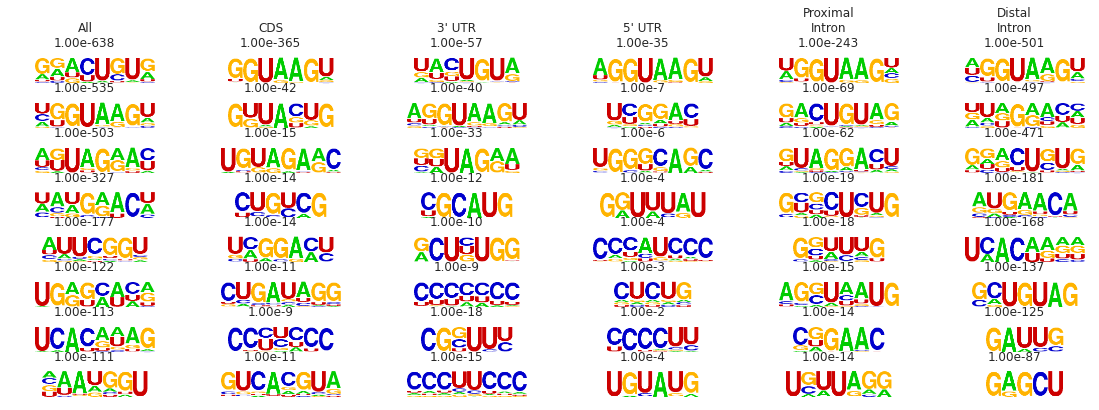

In [9]:
#this won't finish before I turn off the computer, but at least the results will be there
plot_denovo_motifs(rbps['taf15'])
fig = plt.gcf()
fig.savefig("/nas3/gpratt/Dropbox/TAF15/Data/clip/motifs/taf15_clip.svg")

Figure Legend: TAF15 Motifs using whole sub-transcriptomic region as background